In [1]:
!pip install --user shap
## installed the SHAP to explain machine learning model predictions by showing how each feature contributes to the final output

In [3]:
from google.colab import files
uploaded = files.upload()
## Uploading the data set file into google colab.

Saving WA_Fn-UseC_-HR-Employee-Attrition.csv to WA_Fn-UseC_-HR-Employee-Attrition.csv


In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

## imported all the required libraries.

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
df_encoded = df.copy()
label_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
              'JobRole', 'MaritalStatus', 'OverTime', 'Attrition']

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

if 'AgeGroup' in df_encoded.columns:
    df_encoded.drop('AgeGroup', axis=1, inplace=True)

# Define features and target
X = df_encoded.drop('Attrition', axis=1)
y = df_encoded['Attrition']

X = X.select_dtypes(include=['int64', 'float64'])

# Scale numeric features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [10]:
print(X_scaled.shape)

(1470, 33)


In [12]:
import numpy as np

# Convert DataFrame to NumPy array before flattening
print(np.any([isinstance(val, str) for val in X.to_numpy().flatten()]))

False


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("📋 Classification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.8662131519274376
📊 Confusion Matrix:
 [[367  13]
 [ 46  15]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.93       380
           1       0.54      0.25      0.34        61

    accuracy                           0.87       441
   macro avg       0.71      0.61      0.63       441
weighted avg       0.84      0.87      0.84       441



In [14]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_dt = model_dt.predict(X_test)

print("✅ Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("📋 Classification Report:\n", classification_report(y_test, y_pred_dt))

import pandas as pd

# Assuming you trained a DecisionTreeClassifier as model_dt
feature_importance = pd.Series(model_dt.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).head(10)

✅ Decision Tree Accuracy: 0.7959183673469388
📊 Confusion Matrix:
 [[331  49]
 [ 41  20]]
📋 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       380
           1       0.29      0.33      0.31        61

    accuracy                           0.80       441
   macro avg       0.59      0.60      0.59       441
weighted avg       0.81      0.80      0.80       441



,0
MonthlyIncome,0.123032
Age,0.083399
OverTime,0.074690
DistanceFromHome,0.059385
NumCompaniesWorked,0.059312
TotalWorkingYears,0.059031
DailyRate,0.056841
HourlyRate,0.053904
MonthlyRate,0.044128
PercentSalaryHike,0.038763


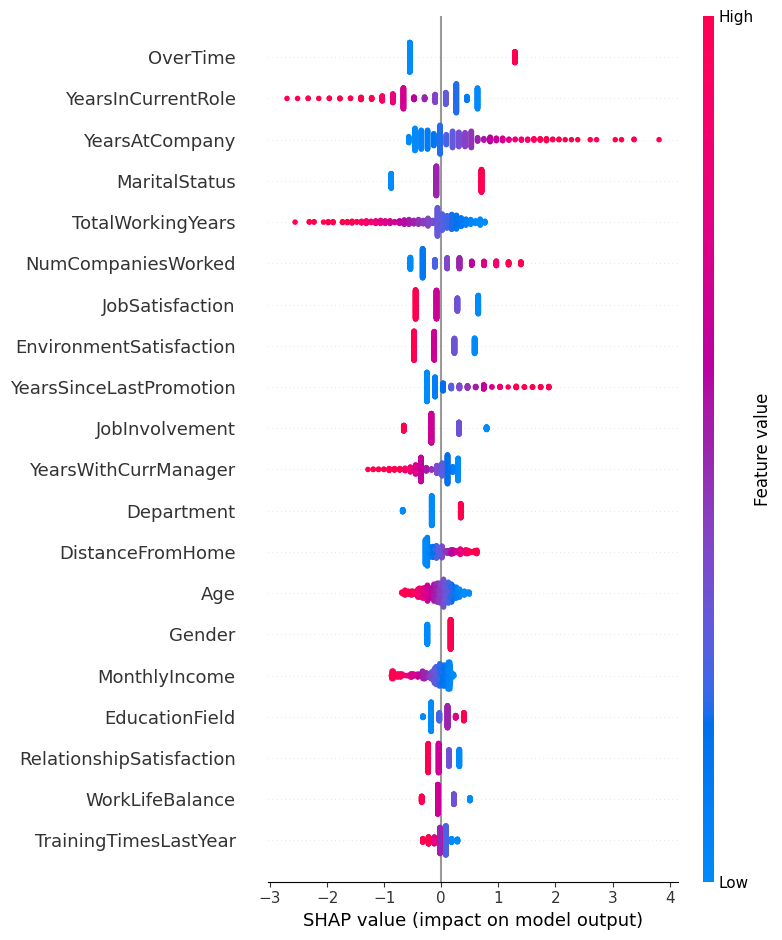

In [15]:
import shap

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

## SHAP Feature Impact
OverTime, tenure, and satisfaction levels strongly influence attrition predictions, with SHAP revealing both direction and magnitude of feature contributions.